In [4]:
#Data Manipulation
import pandas as pd
import numpy as np

# Machine learning (preprocessing, models, evaluation)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

# Graphics
from tqdm import tqdm

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Reading 2018 data csv into DF

In [5]:
#Read in 2018 data
df = pd.read_csv('Data_2/2018_Financial_Data.csv')

In [6]:
#Rename Ticker column
df = df.rename(columns={'Unnamed: 0': 'Ticker'})
df.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


# Remove Columns with Many Missing Values

In [7]:


# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 225 columns.
There are 221 columns that have missing values.
We will remove 2 columns.


In [9]:
# Drop the columns
df_1 = df.drop(columns = list(missing_columns))

In [10]:
df_1.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


# Correlation between Features and Target

In [11]:
# Find all correlations and sort 
correlations_1 = df_1.corr()['2019 PRICE VAR [%]'].sort_values()

# Print the most negative correlations
print(correlations_1.head(15), '\n')

# Print the most positive correlations
print(correlations_1.tail(15))

dividendpaidAndCapexCoverageRatios       -0.062763
capitalExpenditureCoverageRatios         -0.062683
Tangible Book Value per Share            -0.024703
Graham Number                            -0.023594
Weighted Average Shares Growth           -0.021440
pretaxProfitMargin                       -0.021181
Weighted Average Shares Diluted Growth   -0.020745
Issuance (buybacks) of shares            -0.020262
Market Cap                               -0.019812
netProfitMargin                          -0.018463
eBITperRevenue                           -0.018076
ebitperRevenue                           -0.018076
Enterprise Value over EBITDA             -0.016804
payablesTurnover                         -0.015713
Payables Turnover                        -0.015713
Name: 2019 PRICE VAR [%], dtype: float64 

priceEarningsRatio                            0.025605
PE ratio                                      0.025605
5Y Shareholders Equity Growth (per Share)     0.026349
5Y Net Income Growth (per S

#### To account for possible non-linear relationships, I now take the square root and natural log transformations of the features and then calculate the correlation coefficients with the 2019 price performance.

In [12]:
df_1.head()


,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [13]:
# Create columns with square root and log of numeric columns
for col in df_1.columns:
    # Skip the Price Var column
    if col == '2019 PRICE VAR [%]' or col == 'Class' or col == 'Ticker' or col == 'Sector':
        next
    else:
        df_1['sqrt_' + col] = np.sqrt(df_1[col])
        df_1['log_' + col] = np.log(df_1[col])

# Drop stocks without 2019 price performance
df_2 = df_1.dropna(subset = ['2019 PRICE VAR [%]'])

# Find correlations with the price performance 
correlations = df_2.corr()['2019 PRICE VAR [%]'].dropna().sort_values()

C:\Users\henat\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\henat\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\henat\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [14]:
df_2.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,sqrt_Asset Growth,log_Asset Growth,sqrt_Book Value per Share Growth,log_Book Value per Share Growth,sqrt_Debt Growth,log_Debt Growth,sqrt_R&D Expense Growth,log_R&D Expense Growth,sqrt_SG&A Expenses Growth,log_SG&A Expenses Growth
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.585320,-1.071192,0.268701,-2.628315,0.854927,-0.313479,0.000000,-inf,0.361663,-2.034086
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,NaN,NaN,0.087178,-4.879607,NaN,NaN,0.000000,-inf,NaN,NaN
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.195448,-3.264920,0.318434,-2.288682,NaN,NaN,0.197484,-3.244194,NaN,NaN
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.476970,-1.480605,0.799687,-0.447069,NaN,NaN,0.416893,-1.749850,0.306920,-2.362335
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,0.175499,-3.480241


In [15]:
correlations.head()

log_dividendYield                    -0.087399
log_Free Cash Flow Yield             -0.072231
dividendpaidAndCapexCoverageRatios   -0.062763
capitalExpenditureCoverageRatios     -0.062683
log_Net Cash/Marketcap               -0.056175
Name: 2019 PRICE VAR [%], dtype: float64

# Remove Collinear Features

In [16]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['2019 PRICE VAR [%]']
    x = x.drop(columns = ['2019 PRICE VAR [%]'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    
    # Add the score back in to the data
    x['2019 PRICE VAR [%]'] = y
               
    return x

In [17]:
# Remove the collinear features above a specified correlation coefficient
df_3 = remove_collinear_features(df_2, 0.6);

C:\Users\henat\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


In [18]:
# Remove any columns with all na values
df_complete  = df_3.dropna(axis=1, how = 'all')
df_complete.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,log_Asset Growth,sqrt_Book Value per Share Growth,log_Book Value per Share Growth,sqrt_Debt Growth,log_Debt Growth,sqrt_R&D Expense Growth,log_R&D Expense Growth,sqrt_SG&A Expenses Growth,log_SG&A Expenses Growth,2019 PRICE VAR [%]
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,-1.071192,0.268701,-2.628315,0.854927,-0.313479,0.000000,-inf,0.361663,-2.034086,32.794573
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,NaN,0.087178,-4.879607,NaN,NaN,0.000000,-inf,NaN,NaN,40.588068
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,-3.264920,0.318434,-2.288682,NaN,NaN,0.197484,-3.244194,NaN,NaN,30.295514
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,-1.480605,0.799687,-0.447069,NaN,NaN,0.416893,-1.749850,0.306920,-2.362335,64.213737
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,NaN,NaN,NaN,NaN,NaN,0.000000,-inf,0.175499,-3.480241,44.757840


In [19]:
df_complete.nunique()

Ticker                                             4392
Revenue                                            4104
Revenue Growth                                     2977
Cost of Revenue                                    3288
Gross Profit                                       4094
R&D Expenses                                       1523
SG&A Expense                                       4056
Operating Expenses                                 4149
Operating Income                                   4282
Interest Expense                                   2950
Earnings before Tax                                4274
Income Tax Expense                                 3412
Net Income - Non-Controlling int                   1205
Net Income - Discontinued ops                       356
Net Income                                         4151
Preferred Dividends                                 457
Net Income Com                                     4181
EPS                                             

# Separate out the features and targets

In [20]:
#For 2019 Variance Target
# Separate out the features and targets
features_var = df_complete.drop(columns=['2019 PRICE VAR [%]','Sector', 'Class'], axis=1)
targets_var = pd.DataFrame(df_complete['2019 PRICE VAR [%]'])

# Replace the inf and -inf with nan (required for later imputation)
features_var = features_var.replace({np.inf: np.nan, -np.inf: np.nan})

In [21]:
features_var.columns.values

array(['Ticker', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense',
       'Operating Expenses', 'Operating Income', 'Interest Expense',
       'Earnings before Tax', 'Income Tax Expense',
       'Net Income - Non-Controlling int',
       'Net Income - Discontinued ops', 'Net Income',
       'Preferred Dividends', 'Net Income Com', 'EPS', 'EPS Diluted',
       'Weighted Average Shs Out', 'Weighted Average Shs Out (Dil)',
       'Dividend per Share', 'Gross Margin', 'EBITDA Margin',
       'EBIT Margin', 'Profit Margin', 'Free Cash Flow margin', 'EBITDA',
       'EBIT', 'Consolidated Income', 'Earnings Before Tax Margin',
       'Net Profit Margin', 'Cash and cash equivalents',
       'Short-term investments', 'Cash and short-term investments',
       'Receivables', 'Inventories', 'Total current assets',
       'Property, Plant & Equipment Net',
       'Goodwill and Intangible Assets', 'Long-term investments',
       'Tax assets', 'Tot

In [22]:
features_var_final = features_var.drop(columns=['Ticker'], axis=1)

# Saving the  Complete Scoring Features and Complete Scoring Labels csv

In [23]:
# Save the scoring data features and labels to csv

features_var_final.to_csv('data/complete_scoring_features.csv', index = False)
features_var.to_csv('data/complete_scoring_features_ticker.csv', index = True)

targets_var.to_csv('data/complete_scoring_labels.csv', index = False)


In [24]:
features_var.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,sqrt_Asset Growth,log_Asset Growth,sqrt_Book Value per Share Growth,log_Book Value per Share Growth,sqrt_Debt Growth,log_Debt Growth,sqrt_R&D Expense Growth,log_R&D Expense Growth,sqrt_SG&A Expenses Growth,log_SG&A Expenses Growth
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.585320,-1.071192,0.268701,-2.628315,0.854927,-0.313479,0.000000,NaN,0.361663,-2.034086
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,NaN,NaN,0.087178,-4.879607,NaN,NaN,0.000000,NaN,NaN,NaN
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.195448,-3.264920,0.318434,-2.288682,NaN,NaN,0.197484,-3.244194,NaN,NaN
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.476970,-1.480605,0.799687,-0.447069,NaN,NaN,0.416893,-1.749850,0.306920,-2.362335
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.175499,-3.480241


In [25]:
features_var.nunique()

Ticker                                             4392
Revenue                                            4104
Revenue Growth                                     2977
Cost of Revenue                                    3288
Gross Profit                                       4094
R&D Expenses                                       1523
SG&A Expense                                       4056
Operating Expenses                                 4149
Operating Income                                   4282
Interest Expense                                   2950
Earnings before Tax                                4274
Income Tax Expense                                 3412
Net Income - Non-Controlling int                   1205
Net Income - Discontinued ops                       356
Net Income                                         4151
Preferred Dividends                                 457
Net Income Com                                     4181
EPS                                             

# Impute Missing Values

In [26]:
# Read in data into dataframes 
score_features = pd.read_csv('data/complete_scoring_features.csv')
score_labels = pd.read_csv('data/complete_scoring_labels.csv')

# Display sizes of data
print('Training Feature Size: ', score_features.shape)
print('Training Labels Size:  ', score_labels.shape)


Training Feature Size:  (4392, 657)
Training Labels Size:   (4392, 1)


In [27]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(score_features)

# Transform both training data and testing data
X_Score = imputer.transform(score_features)


In [28]:
# Make sure all values are finite
print(np.where(~np.isfinite(X_Score)))

(array([], dtype=int64), array([], dtype=int64))


# Scale Features

In [29]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_Score)

# Transform both the training and testing data
X_Score = scaler.transform(X_Score)


In [30]:
# Convert y to one-dimensional array (vector)
#y = np.array(score_labels).reshape((-1, ))
y=score_labels
#y = y.rename(columns={'Unnamed: 0': 'Unn'})
#y = y.drop(y['Unn'], axis=1)
y.head()

,2019 PRICE VAR [%]
0,32.794573
1,40.588068
2,30.295514
3,64.213737
4,44.757840


# ML Models

In [31]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_Score, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_Score)
    #model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_pred

In [32]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_var = fit_and_evaluate(knn)

#print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

# Output Prediction of KNN Model

In [33]:
print(knn_var)

[[ 25.6767113 ]
 [ 31.18234593]
 [ 23.87597496]
 ...
 [ -8.98562844]
 [-23.00484607]
 [  0.34188286]]


In [34]:
dfvar=pd.DataFrame(knn_var)

In [35]:
#Rename Ticker column
df = dfvar.rename(columns={0: 'PredVar'})
df.head()

,PredVar
0,25.676711
1,31.182346
2,23.875975
3,34.710579
4,23.757251


# Joining to Orginal csv to get Ticker(Work In Progress)

In [36]:
features_var.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,sqrt_Asset Growth,log_Asset Growth,sqrt_Book Value per Share Growth,log_Book Value per Share Growth,sqrt_Debt Growth,log_Debt Growth,sqrt_R&D Expense Growth,log_R&D Expense Growth,sqrt_SG&A Expenses Growth,log_SG&A Expenses Growth
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.585320,-1.071192,0.268701,-2.628315,0.854927,-0.313479,0.000000,NaN,0.361663,-2.034086
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,NaN,NaN,0.087178,-4.879607,NaN,NaN,0.000000,NaN,NaN,NaN
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.195448,-3.264920,0.318434,-2.288682,NaN,NaN,0.197484,-3.244194,NaN,NaN
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.476970,-1.480605,0.799687,-0.447069,NaN,NaN,0.416893,-1.749850,0.306920,-2.362335
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.175499,-3.480241


In [37]:
features_var.nunique()

Ticker                                             4392
Revenue                                            4104
Revenue Growth                                     2977
Cost of Revenue                                    3288
Gross Profit                                       4094
R&D Expenses                                       1523
SG&A Expense                                       4056
Operating Expenses                                 4149
Operating Income                                   4282
Interest Expense                                   2950
Earnings before Tax                                4274
Income Tax Expense                                 3412
Net Income - Non-Controlling int                   1205
Net Income - Discontinued ops                       356
Net Income                                         4151
Preferred Dividends                                 457
Net Income Com                                     4181
EPS                                             

In [38]:
dfvarfinal=df.append(features_var)

C:\Users\henat\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [39]:
dfvarfinal.head()

,10Y Dividend per Share Growth (per Share),10Y Net Income Growth (per Share),10Y Operating CF Growth (per Share),10Y Revenue Growth (per Share),10Y Shareholders Equity Growth (per Share),3Y Dividend per Share Growth (per Share),3Y Net Income Growth (per Share),3Y Operating CF Growth (per Share),3Y Revenue Growth (per Share),3Y Shareholders Equity Growth (per Share),...,sqrt_priceToFreeCashFlowsRatio,sqrt_priceToOperatingCashFlowsRatio,sqrt_priceToSalesRatio,sqrt_quickRatio,sqrt_returnOnAssets,sqrt_returnOnCapitalEmployed,sqrt_returnOnEquity,sqrt_shortTermCoverageRatios,sqrt_totalDebtToCapitalization,totalDebtToCapitalization
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
dfvarfinal.nunique()

10Y Dividend per Share Growth (per Share)      899
10Y Net Income Growth (per Share)             1260
10Y Operating CF Growth (per Share)           1589
10Y Revenue Growth (per Share)                1789
10Y Shareholders Equity Growth (per Share)    1745
3Y Dividend per Share Growth (per Share)      1040
3Y Net Income Growth (per Share)              1929
3Y Operating CF Growth (per Share)            2310
3Y Revenue Growth (per Share)                 2533
3Y Shareholders Equity Growth (per Share)     2656
5Y Dividend per Share Growth (per Share)      1052
5Y Net Income Growth (per Share)              1772
5Y Operating CF Growth (per Share)            2031
5Y Revenue Growth (per Share)                 2316
5Y Shareholders Equity Growth (per Share)     2276
Acquisitions and disposals                    1995
Asset Growth                                  3065
Average Inventory                             2266
Average Payables                              3699
Average Receivables            

In [41]:
df.nunique()

PredVar    4360
dtype: int64

In [42]:
dfvarfinal.to_csv('data/PredVarFinal.csv',index=True)

In [43]:
#Read in 2018 data
df2018 = pd.read_csv('Data_2/2018_Financial_Data.csv')
#Rename Ticker column
df2018 = df2018.rename(columns={'Unnamed: 0': 'Ticker'})
df2018.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [44]:
df2018.nunique()

Ticker                                        4392
Revenue                                       4104
Revenue Growth                                2977
Cost of Revenue                               3288
Gross Profit                                  4094
R&D Expenses                                  1523
SG&A Expense                                  4056
Operating Expenses                            4149
Operating Income                              4282
Interest Expense                              2950
Earnings before Tax                           4274
Income Tax Expense                            3412
Net Income - Non-Controlling int              1205
Net Income - Discontinued ops                  356
Net Income                                    4151
Preferred Dividends                            457
Net Income Com                                4181
EPS                                           1589
EPS Diluted                                   1557
Weighted Average Shs Out       

In [45]:
dfvarpred=df2018.append(df)

In [46]:
dfvarpred.head()

,10Y Dividend per Share Growth (per Share),10Y Net Income Growth (per Share),10Y Operating CF Growth (per Share),10Y Revenue Growth (per Share),10Y Shareholders Equity Growth (per Share),2019 PRICE VAR [%],3Y Dividend per Share Growth (per Share),3Y Net Income Growth (per Share),3Y Operating CF Growth (per Share),3Y Revenue Growth (per Share),...,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceToSalesRatio,quickRatio,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,shortTermCoverageRatios,totalDebtToCapitalization
0,0.2558,0.1928,0.1164,0.1327,0.0841,32.794573,0.2348,0.1579,0.1044,0.1107,...,0.0000,12.9254,6.3757,1.6391,0.540449,0.3033,0.0531,0.1638,5.524557,0.609432
1,0.0000,NaN,NaN,NaN,NaN,40.588068,-0.2785,0.8445,-0.0215,-0.0104,...,3.9160,16.0840,6.7309,2.3999,0.632261,0.0446,0.0339,0.0478,1.488489,0.525675
2,0.0815,0.1719,0.1271,0.0876,0.0876,30.295514,0.0772,0.2377,0.1675,0.0959,...,5.5853,15.1845,7.2774,3.0232,1.105016,0.3444,0.1444,0.2824,23.340206,0.261182
3,0.0000,0.0000,0.2762,0.1331,0.1336,64.213737,0.0000,0.6545,0.4586,0.2035,...,1.9878,7.1329,3.5168,2.0135,2.134168,0.4163,0.3052,0.4377,20.256112,0.125606
4,-0.1139,0.0000,-0.2058,-0.0262,-0.1026,44.757840,-0.2619,0.0000,-0.3716,0.0639,...,0.0000,89.2974,14.9109,0.5206,1.402587,NaN,NaN,-0.7216,NaN,0.758131


In [47]:
dfvarpred['PredVar'],dfvarpred['Ticker']

(0             NaN
 1             NaN
 2             NaN
 3             NaN
 4             NaN
 5             NaN
 6             NaN
 7             NaN
 8             NaN
 9             NaN
 10            NaN
 11            NaN
 12            NaN
 13            NaN
 14            NaN
 15            NaN
 16            NaN
 17            NaN
 18            NaN
 19            NaN
 20            NaN
 21            NaN
 22            NaN
 23            NaN
 24            NaN
 25            NaN
 26            NaN
 27            NaN
 28            NaN
 29            NaN
           ...    
 4362    21.239297
 4363   -45.648548
 4364    18.296794
 4365    -8.041378
 4366    24.597984
 4367    27.190832
 4368   -15.722870
 4369    22.828340
 4370    18.605677
 4371    22.798386
 4372    -5.191875
 4373    21.927325
 4374     2.360812
 4375    21.193683
 4376    -0.067407
 4377   -11.026720
 4378    23.970245
 4379   -10.353605
 4380    -3.714600
 4381    24.662964
 4382    14.755946
 4383   -66.

In [48]:
dfvarpred.nunique()

10Y Dividend per Share Growth (per Share)      899
10Y Net Income Growth (per Share)             1260
10Y Operating CF Growth (per Share)           1589
10Y Revenue Growth (per Share)                1789
10Y Shareholders Equity Growth (per Share)    1745
2019 PRICE VAR [%]                            4381
3Y Dividend per Share Growth (per Share)      1040
3Y Net Income Growth (per Share)              1929
3Y Operating CF Growth (per Share)            2310
3Y Revenue Growth (per Share)                 2533
3Y Shareholders Equity Growth (per Share)     2656
5Y Dividend per Share Growth (per Share)      1052
5Y Net Income Growth (per Share)              1772
5Y Operating CF Growth (per Share)            2031
5Y Revenue Growth (per Share)                 2316
5Y Shareholders Equity Growth (per Share)     2276
Acquisitions and disposals                    1995
Asset Growth                                  3065
Average Inventory                             2266
Average Payables               

In [49]:
dfvarpred.to_csv('data/PredVarFinalTicker.csv',index=True)

PermissionError: [Errno 13] Permission denied: 'data/PredVarFinalTicker.csv'

In [ ]:
df_merged = df2018.merge(df, how='inner', left_index=True, right_index=True)

In [ ]:
df_merged.nunique()

In [ ]:
df_merged.head()

In [ ]:
df_merged.to_csv('data/PredVarFinalTicker.csv',index=True)

# Interactive Graph

In [52]:
dfgraph1=pd.read_csv('data/InteractiveGraphYears.csv')

In [53]:
dfgraph_merged = dfgraph1.merge(df, how='inner', left_index=True, right_index=True)

In [54]:
dfgraph_merged.head()

,Unnamed: 0,Ticker,2015,2016,2017,2018,2019,PredVar
0,0,PG,-9.323276,10.809451,12.532463,4.975151,40.680273,25.676711
1,1,VIPS,-25.512193,-21.637010,4.363319,-56.320000,160.000010,31.182346
2,2,KR,33.118297,-15.036503,-17.068252,-0.990449,8.690633,23.875975
3,3,RAD,2.752291,4.303799,-75.916870,-66.666666,0.454550,34.710579
4,4,GIS,12.897715,10.693172,-1.162942,-31.280412,45.027569,23.757251


In [55]:
dfgraph_merged.nunique()

Unnamed: 0    3726
Ticker        3726
2015          3718
2016          3719
2017          3718
2018          3722
2019          3719
PredVar       3715
dtype: int64

# Interactive User Input Based Trend Graph of Price Variance

In [61]:
TInput = input("Which Ticker do you want to predict?  : ") 
print(TInput)

Which Ticker do you want to predict?  : RAD
RAD


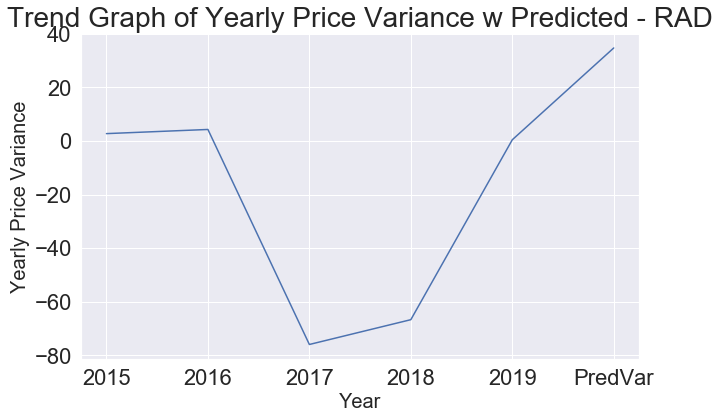

In [64]:
figsize(10,6)
for i in range(len(dfgraph_merged)):
    if dfgraph_merged['Ticker'][i] == TInput:
        plt.plot([k for k in dfgraph_merged.columns[2:]],[dfgraph_merged[y].iloc[i] for y in dfgraph_merged.columns[2:]])
#plt.legend(TInput,loc="upper left")
plt.color='b'
# label the plot
plt.xlabel('Year', size = 20); plt.ylabel('Yearly Price Variance', size = 20); 
plt.title(f'Trend Graph of Yearly Price Variance w Predicted - {TInput}', size = 28);

plt.show()